<a href="https://colab.research.google.com/github/AARATHIPRADEEP/Machine-Learning-Algorithms/blob/main/ImageClassification_Masked_Unmasked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [2]:
os.listdir('/content/drive/MyDrive/masked Data')

['with_mask', 'without_mask']

In [3]:
os.listdir('/content/drive/MyDrive/masked Data/with_mask')

['with_mask_2863.jpg',
 'with_mask_2900.jpg',
 'with_mask_2928.jpg',
 'with_mask_2881.jpg',
 'with_mask_2813.jpg',
 'with_mask_2983.jpg',
 'with_mask_2764.jpg',
 'with_mask_2876.jpg',
 'with_mask_2756.jpg',
 'with_mask_2938.jpg',
 'with_mask_2918.jpg',
 'with_mask_2858.jpg',
 'with_mask_2802.jpg',
 'with_mask_2870.jpg',
 'with_mask_2733.jpg',
 'with_mask_2865.jpg',
 'with_mask_2929.jpg',
 'with_mask_2932.jpg',
 'with_mask_2947.jpg',
 'with_mask_2780.jpg',
 'with_mask_2820.jpg',
 'with_mask_2792.jpg',
 'with_mask_2916.jpg',
 'with_mask_2755.jpg',
 'with_mask_2817.jpg',
 'with_mask_2899.jpg',
 'with_mask_2738.jpg',
 'with_mask_2812.jpg',
 'with_mask_2934.jpg',
 'with_mask_2835.jpg',
 'with_mask_2773.jpg',
 'with_mask_2966.jpg',
 'with_mask_2946.jpg',
 'with_mask_2923.jpg',
 'with_mask_2885.jpg',
 'with_mask_2791.jpg',
 'with_mask_2961.jpg',
 'with_mask_2830.jpg',
 'with_mask_3135.jpg',
 'with_mask_2740.jpg',
 'with_mask_2789.jpg',
 'with_mask_2736.jpg',
 'with_mask_2758.jpg',
 'with_mask

In [4]:
os.listdir('/content/drive/MyDrive/masked Data/without_mask')

['without_mask_3271.jpg',
 'without_mask_3238.jpg',
 'without_mask_2590.jpg',
 'without_mask_3184.jpg',
 'without_mask_3302.jpg',
 'without_mask_2578.jpg',
 'without_mask_3254.jpg',
 'without_mask_2582.jpg',
 'without_mask_2581.jpg',
 'without_mask_2546.jpg',
 'without_mask_2526.jpg',
 'without_mask_2637.jpg',
 'without_mask_3272.jpg',
 'without_mask_2631.jpg',
 'without_mask_2554.jpg',
 'without_mask_2545.jpg',
 'without_mask_3265.jpg',
 'without_mask_3286.jpg',
 'without_mask_3233.jpg',
 'without_mask_2514.jpg',
 'without_mask_2629.jpg',
 'without_mask_3165.jpg',
 'without_mask_2617.jpg',
 'without_mask_3231.jpg',
 'without_mask_3138.jpg',
 'without_mask_3137.jpg',
 'without_mask_2626.jpg',
 'without_mask_3305.jpg',
 'without_mask_2516.jpg',
 'without_mask_3131.jpg',
 'without_mask_2644.jpg',
 'without_mask_3147.jpg',
 'without_mask_3162.jpg',
 'without_mask_3181.jpg',
 'without_mask_3142.jpg',
 'without_mask_2538.jpg',
 'without_mask_2613.jpg',
 'without_mask_3164.jpg',
 'without_ma

In [5]:
len(os.listdir('/content/drive/MyDrive/masked Data/with_mask'))

1432

In [6]:
len(os.listdir('/content/drive/MyDrive/masked Data/without_mask'))

1718

In [7]:
datadir='/content/drive/MyDrive/masked Data'
lst=os.listdir(datadir)
print(lst)
for i in lst:
  subpath=os.path.join(datadir,i)
  print(subpath)
  images=os.listdir(subpath)
  print(images)
  for img in images:
      imgpath=os.path.join(subpath,img)
      print(imgpath)

['with_mask', 'without_mask']
/content/drive/MyDrive/masked Data/with_mask
['with_mask_2863.jpg', 'with_mask_2900.jpg', 'with_mask_2928.jpg', 'with_mask_2881.jpg', 'with_mask_2813.jpg', 'with_mask_2983.jpg', 'with_mask_2764.jpg', 'with_mask_2876.jpg', 'with_mask_2756.jpg', 'with_mask_2938.jpg', 'with_mask_2918.jpg', 'with_mask_2858.jpg', 'with_mask_2802.jpg', 'with_mask_2870.jpg', 'with_mask_2733.jpg', 'with_mask_2865.jpg', 'with_mask_2929.jpg', 'with_mask_2932.jpg', 'with_mask_2947.jpg', 'with_mask_2780.jpg', 'with_mask_2820.jpg', 'with_mask_2792.jpg', 'with_mask_2916.jpg', 'with_mask_2755.jpg', 'with_mask_2817.jpg', 'with_mask_2899.jpg', 'with_mask_2738.jpg', 'with_mask_2812.jpg', 'with_mask_2934.jpg', 'with_mask_2835.jpg', 'with_mask_2773.jpg', 'with_mask_2966.jpg', 'with_mask_2946.jpg', 'with_mask_2923.jpg', 'with_mask_2885.jpg', 'with_mask_2791.jpg', 'with_mask_2961.jpg', 'with_mask_2830.jpg', 'with_mask_3135.jpg', 'with_mask_2740.jpg', 'with_mask_2789.jpg', 'with_mask_2736.jpg', 

In [8]:
categories=['with_mask','without_mask']
datadir='/content/drive/MyDrive/masked Data'

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=[]
target=[]
for i in categories:
  print('loading category.......',i)
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for img in images:
    pathimg=os.path.join(path,img)
    img_array=imread(pathimg)
    img_resized=resize(img_array,(150,150,3))
    data.append(img_resized.flatten())
    target.append(categories.index(i))
  print('loaded category......',i)

loading category....... with_mask
loaded category...... with_mask
loading category....... without_mask
loaded category...... without_mask


In [11]:
X=np.array(data)
X.shape

(3150, 67500)

In [12]:
y=np.array(target)
y

array([0, 0, 0, ..., 1, 1, 1])

splitting train data and test data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


Model building


In [14]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

Confusion Matrix, Classification Report


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       449
           1       0.89      0.91      0.90       496

    accuracy                           0.90       945
   macro avg       0.90      0.90      0.90       945
weighted avg       0.90      0.90      0.90       945



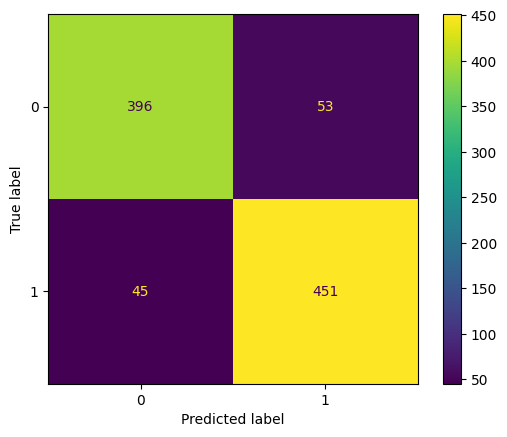

In [15]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

importing a new image


In [22]:
img=imread('/content/drive/MyDrive/maskimg.webp')
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[119, 118, 123],
        [132, 131, 136],
        [150, 149, 154],
        ...,
        [ 86,  86,  88],
        [ 97,  96,  99],
        [ 99,  99, 101]],

       [[120, 119, 124],
        [125, 124, 129],
        [130, 130, 134],
        ...,
        [102, 102, 104],
        [ 80,  80,  82],
        [ 76,  75,  78]],

       [[112, 111, 116],
        [115, 114, 119],
        [121, 120, 125],
        ...,
        [111, 110, 113],
        [ 87,  87,  89],
        [ 77,  76,  79]]

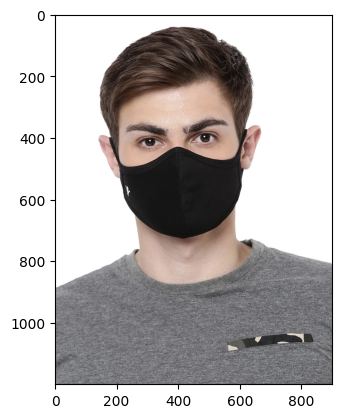

In [23]:
plt.imshow(img)

Resizing the new image

In [24]:
img1=resize(img,(150,150,3)).flatten()
img1

array([1.        , 1.        , 1.        , ..., 0.39876745, 0.39741251,
       0.40663201])

In [25]:
img1=img1.reshape(1,-1)
img1

array([[1.        , 1.        , 1.        , ..., 0.39876745, 0.39741251,
        0.40663201]])

Prediction


In [26]:
y_new=sv.predict(img1)
ind=y_new.item()
print(categories[ind])

with_mask
